In [33]:
# Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as split_data
import math


In [34]:
# Load Dataset
df = pd.read_csv('china.csv')
df.shape

(499, 20)

In [35]:
df.head()

,id,ID,AFP,Input,Output,Enquiry,File,Interface,Added,Changed,Deleted,PDR_AFP,PDR_UFP,NPDR_AFP,NPDU_UFP,Resource,Dev.Type,Duration,N_effort,Effort
0,1,1,1587,774,260,340,128,0,1502,0,0,4.7,5.0,4.7,5.0,4,0,4.0,7490,7490
1,2,2,260,9,4,3,193,41,51,138,61,16.0,16.6,16.0,16.6,2,0,17.0,4150,4150
2,3,3,152,25,33,28,42,35,163,0,0,4.4,4.1,4.4,4.1,1,0,9.0,668,668
3,4,4,252,151,28,8,39,0,69,153,4,12.8,14.3,15.5,17.3,1,0,4.0,3901,3238
4,5,5,292,93,0,194,20,0,0,307,0,10.3,9.8,12.4,11.7,1,0,13.0,3607,2994


In [36]:
data=df.drop(['id'],axis=1)
data.shape

(499, 19)

In [37]:
X=data.drop(['Effort'],axis=1)
y=data['Effort']
print(X)
print(y)

      ID   AFP  Input  Output  Enquiry  File  Interface  Added  Changed  \
0      1  1587    774     260      340   128          0   1502        0   
1      2   260      9       4        3   193         41     51      138   
2      3   152     25      33       28    42         35    163        0   
3      4   252    151      28        8    39          0     69      153   
4      5   292     93       0      194    20          0      0      307   
..   ...   ...    ...     ...      ...   ...        ...    ...      ...   
494  495    51     32       0       16     7          0      0       55   
495  496  1106    410     267      108   152         25    962        0   
496  497    99     13      32        3    42          5     95        0   
497  498    56     24       0        9    14          0     47        0   
498  499   213    123      91       28     0          0     36      206   

     Deleted  PDR_AFP  PDR_UFP  NPDR_AFP  NPDU_UFP  Resource  Dev.Type  \
0          0      4.7    

In [38]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((349, 18), (349,), (150, 18), (150,))

<AxesSubplot:>

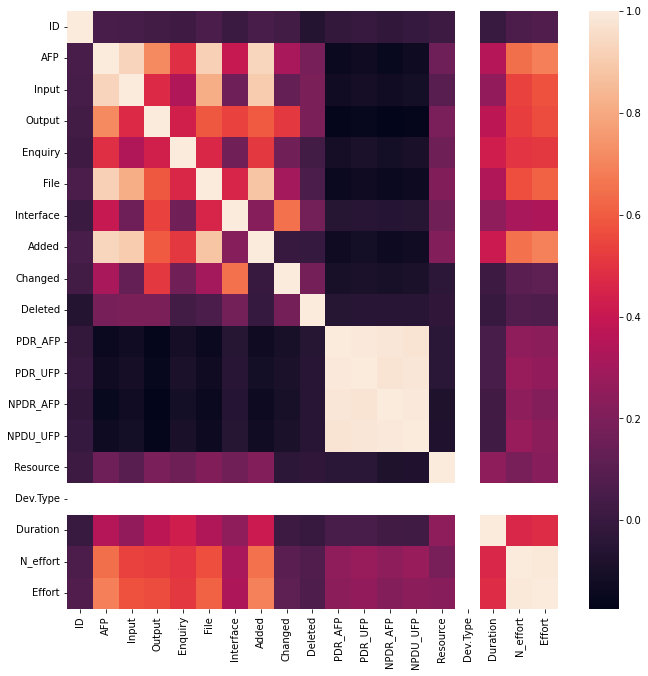

In [39]:
# Visualize Correlated Features
# corr = X_train.corr()
corr=data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

## Brute Force Method to find Correlated Features

In [40]:
from pandas.core.indexes.multi import names_compat
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    # for i in range(len(corr_mat.columns)):
    #     for j in range(i):
    #         if (abs(corr_mat.iloc[i,j]) > threshold):
    #             colname = corr_mat.columns[i]
    #             col_corr.add(colname)
    n=len(corr_mat.columns)
    # print(corr_mat)
    corr_features=set()
    features=[]
    for i in range(n-1):
        if(abs(corr_mat.iloc[i,n-1])>threshold):
            colname = corr_mat.columns[i]
            corr_features.add(colname)
            features.append(i)
    return corr_features,features

In [41]:
correlated_features,features = correlation(data=data, threshold=0.1)
print(len(set(correlated_features)))
print(correlated_features)
print(features)

15
{'PDR_AFP', 'N_effort', 'Output', 'Input', 'File', 'Added', 'Interface', 'AFP', 'NPDR_AFP', 'NPDU_UFP', 'PDR_UFP', 'Duration', 'Changed', 'Resource', 'Enquiry'}
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17]


In [42]:
x_data=X.iloc[:, features].values
y_data=y

# Linear Regression 
x_train, x_test, y_train, y_test = split_data( x_data, y_data, test_size = 1/4, random_state = 80, shuffle=True) 
regressor = LinearRegression()
regressor = regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Root Mean Sqaured Error
MSE = np.square(np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Squared Error :",RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean()
print(f'MAE error is {error}')

Root Mean Squared Error : 0.35325310586805875
MAE error is 0.08428359724035786


In [48]:
# SVM
from sklearn.model_selection import train_test_split as split_data
X_train, X_test, Y_train, Y_test = split_data(x_data, y_data , test_size = 0.2 , shuffle=True)

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
svr=SVR() 
svr.fit(X_train,Y_train)
Y_pred=svr.predict(X_test)

#Root Mean Squared Error
MSE = np.square(np.subtract(Y_test,Y_pred)/np.maximum(np.absolute(Y_test),np.absolute(Y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(Y_test,Y_pred)/np.maximum(np.absolute(Y_test),np.absolute(Y_pred))).mean()
print(f'MAE error is {error}')

Root Mean Square Error:

0.6095697201196488
MAE error is 0.02339607280355673


In [55]:
# Random Forest
from sklearn.model_selection import train_test_split as split_data
x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size=0.20, shuffle=True)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
treeModel = DecisionTreeRegressor(max_depth=5, random_state=None)
treeModel.fit(x_train, y_train)
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=50, criterion="absolute_error")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error as MAE
error = (np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean()
print(f'MAE error is {error}')

# Root Mean Squared Error
MSE = np.square(np.subtract(y_test,y_pred)/np.maximum(np.absolute(y_test),np.absolute(y_pred))).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(RMSE)

MAE error is -0.14135049775336367
Root Mean Square Error:
0.3718394652182474
